In [ ]:
! pip3 install -q kaggle

from google.colab import drive
drive.mount('/content/drive/')

! mkdir ~/.kaggle

Mounted at /content/drive/


In [ ]:
! cp /content/drive/MyDrive/kaggle.json /root/.kaggle

! chmod 600 /root/.kaggle/kaggle.json

! kaggle datasets download -d paultimothymooney/breast-histopathology-images

! unzip breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
! pip install tensorflow-probability

# to generate gifs
! pip install imageio
! pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-me9qe6oe
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-me9qe6oe
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184397 sha256=927034fdc33179cbe5da35b1dacf0c3e910271029a141d5518fcb1fb4e0f8348
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbyt_3bx/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [ ]:
from glob import glob
data = glob('IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [ ]:
img_size = 64
num_channels = 1

In [ ]:
import random

def randomSamples(imageData):
    lst = list()
    while(len(lst) != 50000):
        a = random.choice(imageData)

        if a not in lst:
            lst.append(a)

    return lst

In [ ]:
import cv2
import matplotlib.pyplot as plt

images = list()
labels = list()
newData = list()

newData = randomSamples(data)

for i in newData:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)
        labels.append(label)

In [ ]:
import tensorflow as tf

NameError: ignored

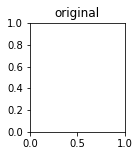

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(images_original[i]))
    plt.gray()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

images = list()
labels = list()
newData = list()

# newData = randomSamples(data)
newData_0 = randomSamples(data_0)
newData_1 = randomSamples(data_1)

for i in newData_0:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)
        labels.append(label)

for i in newData_1:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)
        labels.append(label)

NameError: ignored

In [ ]:
images_array = np.array(images)

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images_array, y, random_state = 42, test_size = 0.25)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42, test_size = 0.25)

In [ ]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], img_size, img_size, num_channels)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(x_train)
test_images = preprocess_images(x_test)
val_images = preprocess_images(x_val)

In [ ]:
train_images.shape, test_images.shape, val_images.shape

In [ ]:
train_size = train_images.shape[0]
batch_size = 64
test_size = test_images.shape[0]
val_size = val_images.shape[0]

In [ ]:
import tensorflow as tf

In [ ]:
! pip install keras-tuner -q

In [ ]:
import keras_tuner as kt

In [ ]:
import tensorflow_probability as tfp
import time
import imageio
from tensorflow.keras import layers

In [ ]:
noise_factor = 0.2

In [ ]:
train_images_noisy = train_images + noise_factor * tf.random.normal(shape = train_images.shape)
test_images_noisy = test_images + noise_factor * tf.random.normal(shape = test_images.shape)
val_images_noisy = val_images + noise_factor * tf.random.normal(shape = val_images.shape)

train_images_noisy_1 = tf.clip_by_value(train_images_noisy, clip_value_min = 0., clip_value_max = 1.)
test_images_noisy_1 = tf.clip_by_value(test_images_noisy, clip_value_min = 0., clip_value_max = 1.)
val_images_noisy_1 = tf.clip_by_value(val_images_noisy, clip_value_min = 0., clip_value_max = 1.)

In [ ]:
# Shuffling the data

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images_noisy_1).
             shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images_noisy_1).
                shuffle(test_size).batch(batch_size))
val_dataset = (tf.data.Dataset.from_tensor_slices(val_images_noisy_1).
              shuffle(val_size).batch(batch_size))

NameError: ignored

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
plt.show()

# Building VAE

In [ ]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(img_size, img_size, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=2, activation='relu', padding = 'same'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=2, activation='relu', padding = 'same'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=16*16*64, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 64)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [ ]:
# Loss function and optimizer

optimizer = keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis = 1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis = raxis
  )

def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits = x_logit, labels = x)
  logpx_z = -tf.reduce_sum(cross_ent, axis = [1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
  """
  Executes one training step and returns the loss.
  This function copmutes the loss and gradients, and uses the latter to
  update the model's paramerters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [ ]:
# Training

epochs = 50

# Set the dimensionality of the latent space to a plane for visualization
latent_dim = 5
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape = [num_examples_to_generate, latent_dim]
)
model = CVAE(latent_dim)

In [ ]:
model.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                163850    
                                                                 
Total params: 182,666
Trainable params: 182,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16384)             98304     
                                                                 
 reshape_2 (Reshape)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 32, 32, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 64, 64, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 64, 64, 1)        289       
 ranspose)                                                       
                                                      

In [ ]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize = (4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap = 'gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# Pick a sample of hte test set for generating output images

assert batch_size >= num_examples_to_generate

for val_batch in val_dataset.take(1):
  test_sample = val_batch[0:num_examples_to_generate, :, :, :]

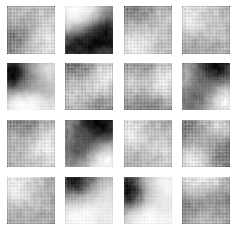

Epoch: 1, Test set ELBO: -1608.3876953125, time elapse for current epoch: 6.676351547241211


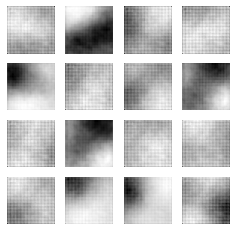

Epoch: 2, Test set ELBO: -1608.0323486328125, time elapse for current epoch: 6.2630579471588135


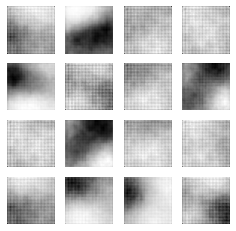

Epoch: 3, Test set ELBO: -1606.7125244140625, time elapse for current epoch: 6.305477857589722


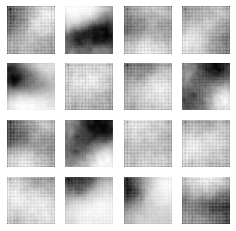

Epoch: 4, Test set ELBO: -1605.9422607421875, time elapse for current epoch: 6.325623512268066


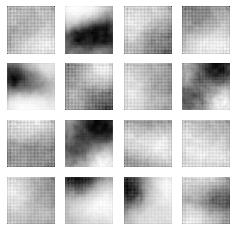

Epoch: 5, Test set ELBO: -1605.76171875, time elapse for current epoch: 6.360201358795166


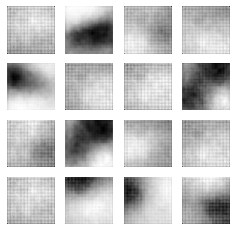

Epoch: 6, Test set ELBO: -1605.724365234375, time elapse for current epoch: 6.38871693611145


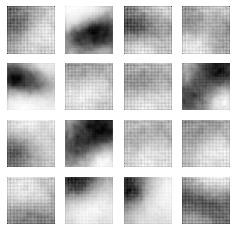

Epoch: 7, Test set ELBO: -1605.0447998046875, time elapse for current epoch: 6.448651075363159


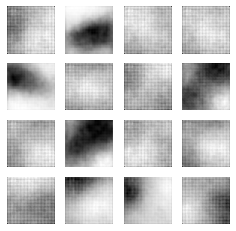

Epoch: 8, Test set ELBO: -1604.9666748046875, time elapse for current epoch: 6.454754829406738


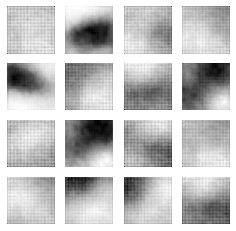

Epoch: 9, Test set ELBO: -1604.529052734375, time elapse for current epoch: 6.43536114692688


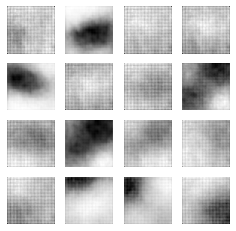

Epoch: 10, Test set ELBO: -1604.3955078125, time elapse for current epoch: 6.418966770172119


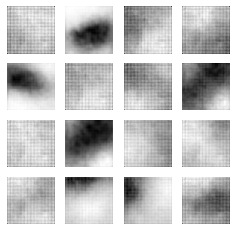

Epoch: 11, Test set ELBO: -1603.5714111328125, time elapse for current epoch: 6.376270294189453


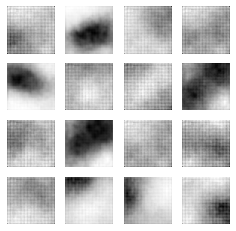

Epoch: 12, Test set ELBO: -1603.876220703125, time elapse for current epoch: 6.365041494369507


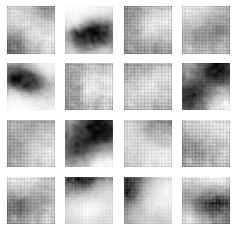

Epoch: 13, Test set ELBO: -1603.296875, time elapse for current epoch: 6.352336168289185


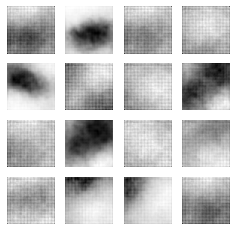

Epoch: 14, Test set ELBO: -1602.125732421875, time elapse for current epoch: 6.360161304473877


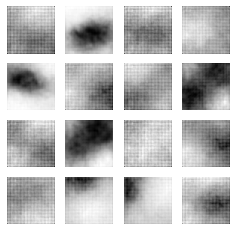

Epoch: 15, Test set ELBO: -1603.2613525390625, time elapse for current epoch: 6.383960723876953


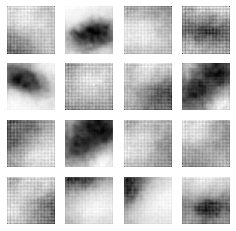

Epoch: 16, Test set ELBO: -1602.5826416015625, time elapse for current epoch: 6.401849746704102


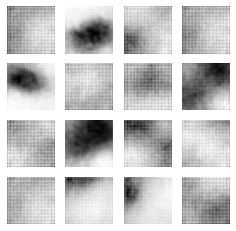

Epoch: 17, Test set ELBO: -1602.356689453125, time elapse for current epoch: 6.41054368019104


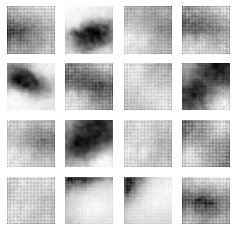

Epoch: 18, Test set ELBO: -1602.2779541015625, time elapse for current epoch: 6.406872510910034


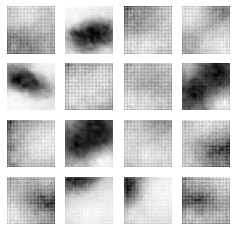

Epoch: 19, Test set ELBO: -1602.1295166015625, time elapse for current epoch: 6.4242799282073975


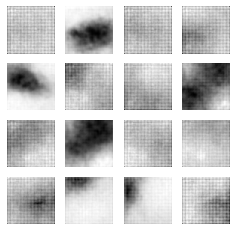

Epoch: 20, Test set ELBO: -1601.6173095703125, time elapse for current epoch: 6.404791593551636


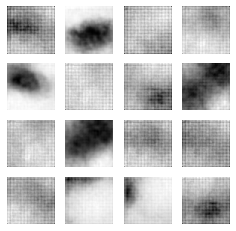

Epoch: 21, Test set ELBO: -1600.9373779296875, time elapse for current epoch: 6.401875257492065


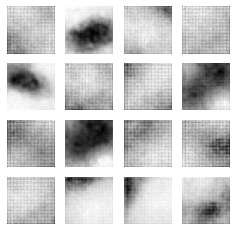

Epoch: 22, Test set ELBO: -1601.5556640625, time elapse for current epoch: 6.400380373001099


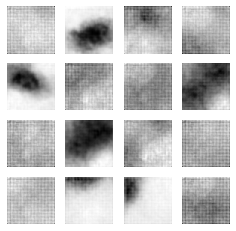

Epoch: 23, Test set ELBO: -1601.21826171875, time elapse for current epoch: 6.407760143280029


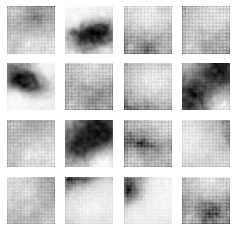

Epoch: 24, Test set ELBO: -1601.38427734375, time elapse for current epoch: 6.402235269546509


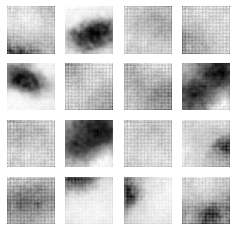

Epoch: 25, Test set ELBO: -1602.140625, time elapse for current epoch: 6.383636951446533


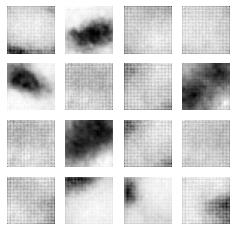

Epoch: 26, Test set ELBO: -1601.6785888671875, time elapse for current epoch: 6.3781898021698


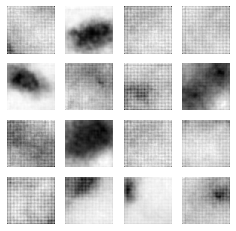

Epoch: 27, Test set ELBO: -1601.552978515625, time elapse for current epoch: 6.415026664733887


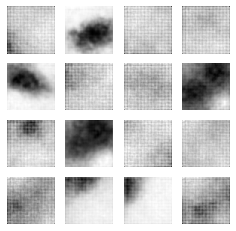

Epoch: 28, Test set ELBO: -1601.2265625, time elapse for current epoch: 6.414210081100464


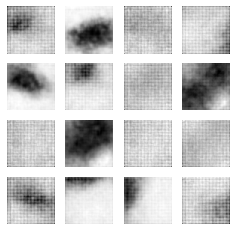

Epoch: 29, Test set ELBO: -1601.178955078125, time elapse for current epoch: 6.405307292938232


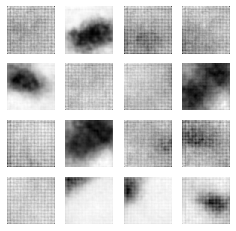

Epoch: 30, Test set ELBO: -1601.4913330078125, time elapse for current epoch: 6.405601263046265


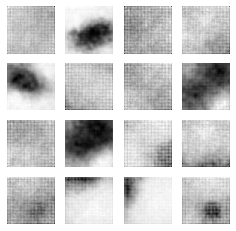

Epoch: 31, Test set ELBO: -1601.101318359375, time elapse for current epoch: 6.4132890701293945


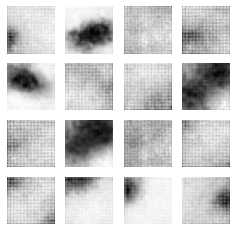

Epoch: 32, Test set ELBO: -1601.1473388671875, time elapse for current epoch: 6.40646767616272


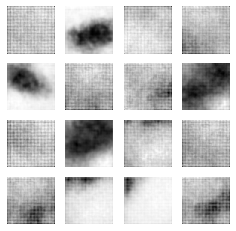

Epoch: 33, Test set ELBO: -1600.5399169921875, time elapse for current epoch: 6.405962944030762


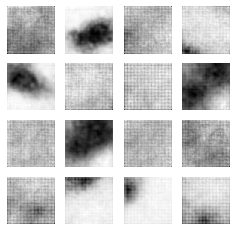

Epoch: 34, Test set ELBO: -1600.3553466796875, time elapse for current epoch: 6.414055824279785


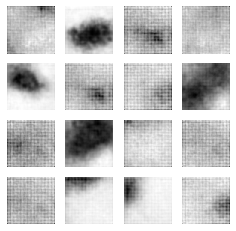

Epoch: 35, Test set ELBO: -1601.6768798828125, time elapse for current epoch: 6.39232873916626


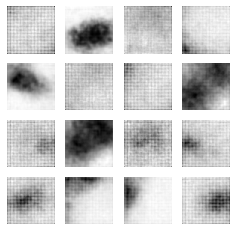

Epoch: 36, Test set ELBO: -1601.484619140625, time elapse for current epoch: 6.47448205947876


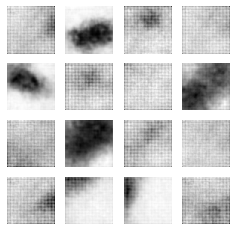

Epoch: 37, Test set ELBO: -1600.95068359375, time elapse for current epoch: 6.388391017913818


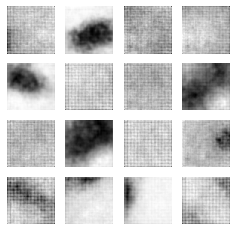

Epoch: 38, Test set ELBO: -1601.0150146484375, time elapse for current epoch: 6.410823822021484


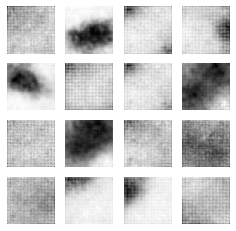

Epoch: 39, Test set ELBO: -1601.215576171875, time elapse for current epoch: 6.412460803985596


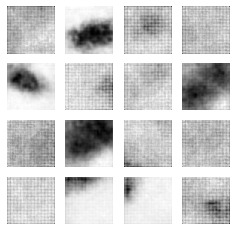

Epoch: 40, Test set ELBO: -1602.451904296875, time elapse for current epoch: 6.399061679840088


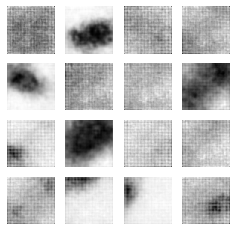

Epoch: 41, Test set ELBO: -1601.506591796875, time elapse for current epoch: 6.399820566177368


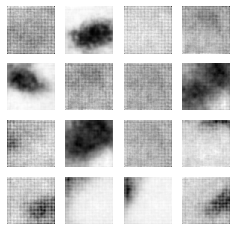

Epoch: 42, Test set ELBO: -1601.0233154296875, time elapse for current epoch: 6.4282612800598145


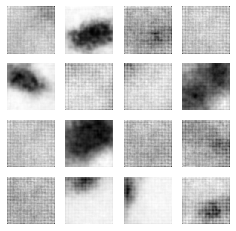

Epoch: 43, Test set ELBO: -1602.1343994140625, time elapse for current epoch: 6.417315483093262


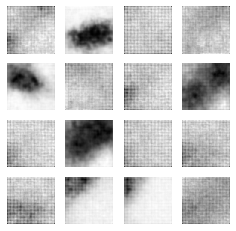

Epoch: 44, Test set ELBO: -1600.9884033203125, time elapse for current epoch: 6.43039345741272


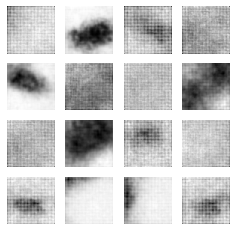

Epoch: 45, Test set ELBO: -1601.037353515625, time elapse for current epoch: 6.398263454437256


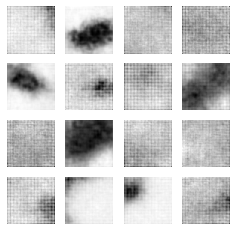

Epoch: 46, Test set ELBO: -1601.4700927734375, time elapse for current epoch: 6.390732526779175


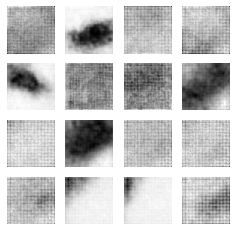

Epoch: 47, Test set ELBO: -1601.298095703125, time elapse for current epoch: 6.392759799957275


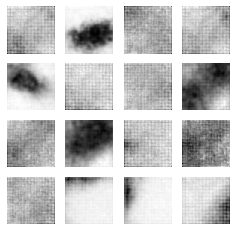

Epoch: 48, Test set ELBO: -1601.0185546875, time elapse for current epoch: 6.4070234298706055


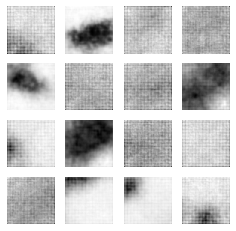

Epoch: 49, Test set ELBO: -1601.0762939453125, time elapse for current epoch: 6.403573274612427


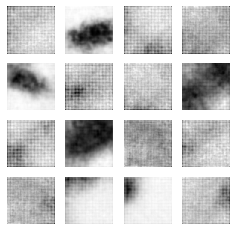

Epoch: 50, Test set ELBO: -1602.329833984375, time elapse for current epoch: 6.42283034324646


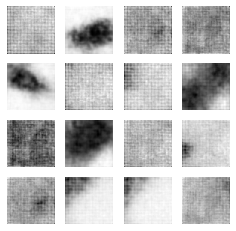

In [ ]:
with tf.device("/gpu:0"):
  generate_and_save_images(model, 0, test_sample)

  for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
      train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = keras.metrics.Mean()
    for val_x in val_dataset:
      loss(compute_loss(model, val_x))
    elbo = -loss.result()
    # display.clear_output(wait = False)
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
          .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

In [ ]:
# Loading the model

NN_model = keras.models.load_model('/content/drive/MyDrive/Local_Backup/Codes_WSL/drive_before_vae.h5')

# saved_model = tensorflow.keras.models.load_model('VAE.h5')

In [ ]:
vae_train_output = list()

for train_sample in train_dataset:
  mean, logvar = model.encode(train_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  vae_train_output.append(predictions)
print(type(vae_train_output[0]))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
type(test_images_noisy.numpy())

numpy.ndarray

In [ ]:
vae_test_output = list()

for test_sample in test_dataset:
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  vae_test_output.append(predictions)
vae_test_output = np.array(vae_test_output)
print(type(vae_test_output))

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

m = [
    'acc', 
    tf.keras.metrics.Precision(), 
    tf.keras.metrics.Recall(), 
    tf.keras.metrics.AUC()
    ]

# opt = Adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad =  False)
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
NN_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = m)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vae_test_output[0]

<tf.Tensor: shape=(64, 64, 64, 1), dtype=float32, numpy=
array([[[[0.5000243 ],
         [0.4997642 ],
         [0.49959943],
         ...,
         [0.49998856],
         [0.4997734 ],
         [0.49989417]],

        [[0.5000702 ],
         [0.501362  ],
         [0.5001882 ],
         ...,
         [0.5011534 ],
         [0.49967286],
         [0.5009236 ]],

        [[0.49997044],
         [0.5001804 ],
         [0.49996865],
         ...,
         [0.5001563 ],
         [0.49938178],
         [0.50056547]],

        ...,

        [[0.5000998 ],
         [0.5011286 ],
         [0.49979934],
         ...,
         [0.5019427 ],
         [0.499308  ],
         [0.50181276]],

        [[0.49954796],
         [0.49967012],
         [0.49958727],
         ...,
         [0.5005549 ],
         [0.4988926 ],
         [0.5001289 ]],

        [[0.5000203 ],
         [0.50040734],
         [0.49972382],
         ...,
         [0.5016025 ],
         [0.49921232],
         [0.49956426]]],


   

In [ ]:
y_train[0]

array([1., 0.], dtype=float32)

In [ ]:
type(test_images), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# VAE Training and Testing data evaluation metrics

# loss_train, accuracy_train, precision_train, recall_train, auc_train = NN_model.evaluate(np.array(vae_train_output), y_train)
loss_test, accuracy_test, precision_test, recall_test, auc_test = NN_model.evaluate(
    np.expand_dims(vae_test_output, -1), np.expand_dims(y_test, -1)
)

ValueError: ignored